In [ ]:
!pip insatll nltk

In [19]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [20]:
df = pd.read_csv('IMDB Dataset.csv')

In [21]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [22]:
i = 3

In [23]:
df.loc[i, 'review']

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [25]:
sentence = df.loc[i, 'review']

### Приведение к нижнему регистру

In [26]:
sentence = sentence.lower()
print(sentence)

basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them.


In [27]:
df['review'] = df['review'].str.lower()

In [28]:
df['review'] = df['review'].apply(lambda line: line.lower())

In [29]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


### Удаление лишних пробелов

In [30]:
def remove_whitespace(text):
    return  " ".join(text.split())

remove_whitespace(sentence)

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [32]:
df.review.apply(lambda line: line.strip()).head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

### Токенизация

In [33]:
from nltk.tokenize import word_tokenize

sentence = df.loc[i, 'review']

words = word_tokenize(sentence)
print(words)

['basically', 'there', "'s", 'a', 'family', 'where', 'a', 'little', 'boy', '(', 'jake', ')', 'thinks', 'there', "'s", 'a', 'zombie', 'in', 'his', 'closet', '&', 'his', 'parents', 'are', 'fighting', 'all', 'the', 'time.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'this', 'movie', 'is', 'slower', 'than', 'a', 'soap', 'opera', '...', 'and', 'suddenly', ',', 'jake', 'decides', 'to', 'become', 'rambo', 'and', 'kill', 'the', 'zombie.', '<', 'br', '/', '>', '<', 'br', '/', '>', 'ok', ',', 'first', 'of', 'all', 'when', 'you', "'re", 'going', 'to', 'make', 'a', 'film', 'you', 'must', 'decide', 'if', 'its', 'a', 'thriller', 'or', 'a', 'drama', '!', 'as', 'a', 'drama', 'the', 'movie', 'is', 'watchable', '.', 'parents', 'are', 'divorcing', '&', 'arguing', 'like', 'in', 'real', 'life', '.', 'and', 'then', 'we', 'have', 'jake', 'with', 'his', 'closet', 'which', 'totally', 'ruins', 'all', 'the', 'film', '!', 'i', 'expected', 'to', 'see', 'a', 'boogeyman', 'similar', 'movie', ',', 'and', 'instead', 'i

### Исправление ошибок

In [138]:
!pip install pyspellchecker

In [34]:
from spellchecker import SpellChecker

def spell_check(text):
    
    result = []
    spell = SpellChecker()
    for word in text:
        correct_word = spell.correction(word)
        result.append(correct_word)
    
    return result

' '.join(spell_check(words))

'basically there is a family where a little boy ( jake ) thinks there is a zombie in his closet & his parents are fighting all the time < be / > < be / > this movie is slower than a soap opera ... and suddenly , jake decides to become rambo and kill the zombie < be / > < be / > ok , first of all when you are going to make a film you must decide if its a thriller or a drama ! as a drama the movie is watchable . parents are divorcing & arguing like in real life . and then we have jake with his closet which totally ruins all the film ! i expected to see a boogeyman similar movie , and instead i watched a drama with some meaningless thriller spots < be / > < be / > 3 out of 10 just for the well playing parents & descent dialogs . as for the shots with jake : just ignore them .'

### Удаление стоп-слов

In [36]:
sentence

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [37]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
stop_words = set(stopwords.words('english')) 
word_tokens = word_tokenize(sentence)
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
print(' '.join(filtered_sentence))

basically 's family little boy ( jake ) thinks 's zombie closet & parents fighting time. < br / > < br / > movie slower soap opera ... suddenly , jake decides become rambo kill zombie. < br / > < br / > ok , first 're going make film must decide thriller drama ! drama movie watchable . parents divorcing & arguing like real life . jake closet totally ruins film ! expected see boogeyman similar movie , instead watched drama meaningless thriller spots. < br / > < br / > 3 10 well playing parents & descent dialogs . shots jake : ignore .


### Удаление пунктуации

In [39]:
import re

In [40]:
punct_re = re.compile(r'\w+')

In [41]:
sentence

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [43]:
# punct_re.findall(sentence)

In [44]:
from nltk.tokenize import RegexpTokenizer

def remove_punct(text):
    
    tokenizer = RegexpTokenizer(r"\w+")
    lst=tokenizer.tokenize(' '.join(text))
    return lst

remove_punct(filtered_sentence)

['basically',
 's',
 'family',
 'little',
 'boy',
 'jake',
 'thinks',
 's',
 'zombie',
 'closet',
 'parents',
 'fighting',
 'time',
 'br',
 'br',
 'movie',
 'slower',
 'soap',
 'opera',
 'suddenly',
 'jake',
 'decides',
 'become',
 'rambo',
 'kill',
 'zombie',
 'br',
 'br',
 'ok',
 'first',
 're',
 'going',
 'make',
 'film',
 'must',
 'decide',
 'thriller',
 'drama',
 'drama',
 'movie',
 'watchable',
 'parents',
 'divorcing',
 'arguing',
 'like',
 'real',
 'life',
 'jake',
 'closet',
 'totally',
 'ruins',
 'film',
 'expected',
 'see',
 'boogeyman',
 'similar',
 'movie',
 'instead',
 'watched',
 'drama',
 'meaningless',
 'thriller',
 'spots',
 'br',
 'br',
 '3',
 '10',
 'well',
 'playing',
 'parents',
 'descent',
 'dialogs',
 'shots',
 'jake',
 'ignore']

### Удаление тегов

In [45]:
import re
def remove_tag(text):
    
    text=' '.join(text)
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

print(sentence)
remove_tag(sentence.split())

basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them.


"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

### Удаление частотных слов

In [46]:
from nltk import FreqDist

def frequent_words(df, col):
    
    lst=[]
    for text in df[col]:
        lst+=text.split()
        
    fdist=FreqDist(lst)
    return fdist.most_common(10)

frequent_words(df, 'review')

[('the', 638861),
 ('a', 316615),
 ('and', 313637),
 ('of', 286661),
 ('to', 264573),
 ('is', 204876),
 ('in', 179807),
 ('i', 141587),
 ('this', 138483),
 ('that', 130140)]

In [49]:
len(stop_words)

179

In [52]:
tokenizer = RegexpTokenizer(r"\w+")
df['review'] = df['review'].apply(lambda line:
                                  ' '.join([word for word in tokenizer.tokenize(line) 
                                   if word not in stop_words]))

In [53]:
df['review']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [54]:
frequent_words(df, 'review')

[('br', 201951),
 ('movie', 87971),
 ('film', 79705),
 ('one', 53603),
 ('like', 40172),
 ('good', 29753),
 ('time', 25110),
 ('even', 24871),
 ('would', 24602),
 ('story', 23119)]

### Удаление чего-либо в соответствии с паттерном

http://localhost:8888/notebooks/Desktop/Я.П/NLP/nltk.ipynb

In [58]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [61]:
text = "nltk very useful library https://www.nltk.org"

print(text)
remove_urls(text)

nltk very useful library https://www.nltk.org


'nltk very useful library '

### Стемминг

In [62]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

for word in sentence.split():
    print(ps.stem(word))

basic
there'
a
famili
where
a
littl
boy
(jake)
think
there'
a
zombi
in
hi
closet
&
hi
parent
are
fight
all
the
time.<br
/><br
/>thi
movi
is
slower
than
a
soap
opera...
and
suddenly,
jake
decid
to
becom
rambo
and
kill
the
zombie.<br
/><br
/>ok,
first
of
all
when
you'r
go
to
make
a
film
you
must
decid
if
it
a
thriller
or
a
drama!
as
a
drama
the
movi
is
watchable.
parent
are
divorc
&
argu
like
in
real
life.
and
then
we
have
jake
with
hi
closet
which
total
ruin
all
the
film!
i
expect
to
see
a
boogeyman
similar
movie,
and
instead
i
watch
a
drama
with
some
meaningless
thriller
spots.<br
/><br
/>3
out
of
10
just
for
the
well
play
parent
&
descent
dialogs.
as
for
the
shot
with
jake:
just
ignor
them.


### Лемматизация

In [63]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("Machine", pos='n'))
# pos: parts of speech tag, verb
print(lemmatizer.lemmatize("caring", pos='v'))

Machine
care


In [64]:
df['review'] = df['review'].apply(lemmatizer.lemmatize)

In [65]:
df['review']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production br br filming tech...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    going disagree previous comment side maltin on...
49999    one expects star trek movies high art fans exp...
Name: review, Length: 50000, dtype: object

In [66]:
df['review'] = df['review'].apply(lambda line: 
                                  [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(line)])

In [67]:
df['review']

0        [one, reviewer, mentioned, watching, 1, oz, ep...
1        [wonderful, little, production, br, br, filmin...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, family, little, boy, jake, think, ...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, side, mal...
49999    [one, expects, star, trek, movie, high, art, f...
Name: review, Length: 50000, dtype: object

### Собери все вместе

In [124]:
df = pd.read_csv('IMDB Dataset.csv')

In [125]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [126]:
df['review'] = df['review'].str.lower()

In [127]:
df.loc[i, 'review']

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [128]:
html_pattern = re.compile('<.*?>')
df['review'] = df.review.apply(lambda x: html_pattern.sub('', x))

In [129]:
df.loc[i, 'review']

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [130]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [131]:
df['review'] = df.review.apply(lambda line: [lemmatizer.lemmatize(w) for w in line.split()])

In [132]:
df['review']

0        [one, of, the, other, reviewer, ha, mentioned,...
1        [a, wonderful, little, production., the, filmi...
2        [i, thought, this, wa, a, wonderful, way, to, ...
3        [basically, there's, a, family, where, a, litt...
4        [petter, mattei's, "love, in, the, time, of, m...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [i'm, going, to, have, to, disagree, with, the...
49999    [no, one, expects, the, star, trek, movie, to,...
Name: review, Length: 50000, dtype: object

In [133]:
df.loc[i, 'review']

['basically',
 "there's",
 'a',
 'family',
 'where',
 'a',
 'little',
 'boy',
 '(jake)',
 'think',
 "there's",
 'a',
 'zombie',
 'in',
 'his',
 'closet',
 '&',
 'his',
 'parent',
 'are',
 'fighting',
 'all',
 'the',
 'time.this',
 'movie',
 'is',
 'slower',
 'than',
 'a',
 'soap',
 'opera...',
 'and',
 'suddenly,',
 'jake',
 'decides',
 'to',
 'become',
 'rambo',
 'and',
 'kill',
 'the',
 'zombie.ok,',
 'first',
 'of',
 'all',
 'when',
 "you're",
 'going',
 'to',
 'make',
 'a',
 'film',
 'you',
 'must',
 'decide',
 'if',
 'it',
 'a',
 'thriller',
 'or',
 'a',
 'drama!',
 'a',
 'a',
 'drama',
 'the',
 'movie',
 'is',
 'watchable.',
 'parent',
 'are',
 'divorcing',
 '&',
 'arguing',
 'like',
 'in',
 'real',
 'life.',
 'and',
 'then',
 'we',
 'have',
 'jake',
 'with',
 'his',
 'closet',
 'which',
 'totally',
 'ruin',
 'all',
 'the',
 'film!',
 'i',
 'expected',
 'to',
 'see',
 'a',
 'boogeyman',
 'similar',
 'movie,',
 'and',
 'instead',
 'i',
 'watched',
 'a',
 'drama',
 'with',
 'some',

In [101]:
from nltk.corpus import stopwords

In [134]:
stop_words = set(stopwords.words('english') + ["there's"]) 
  
df['review'] = df.review.apply(lambda text: [w for w in text if not w in stop_words])

In [135]:
' '.join(df.loc[i, 'review'])

'basically family little boy (jake) think zombie closet & parent fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable. parent divorcing & arguing like real life. jake closet totally ruin film! expected see boogeyman similar movie, instead watched drama meaningless thriller spots.3 10 well playing parent & descent dialogs. shot jake: ignore them.'

In [185]:
def frequent_words(df, col):
    
    lst=[]
    for text_collection in df[col]:
        lst+=text_collection.split()
        
    fdist=FreqDist(lst)
    return fdist

fdist = frequent_words(df, 'review')

In [137]:
fdist.most_common(10)

[('wa', 93275),
 ('movie', 71847),
 ('film', 64667),
 ('one', 46305),
 ('like', 38225),
 ('ha', 32750),
 ('would', 23815),
 ('get', 23741),
 ('even', 23721),
 ('good', 23530)]

In [169]:
df

,review,sentiment
0,one reviewer ha mentioned watching 1 oz episod...,1
1,wonderful little production. filming technique...,1
2,thought wa wonderful way spend time hot summer...,1
3,basically family little boy (jake) think zombi...,0
4,"petter mattei's ""love time money"" visually stu...",1
...,...,...
49995,thought movie right good job. creative origina...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,catholic taught parochial elementary school nu...,0
49998,i'm going disagree previous comment side malti...,0


In [174]:
df_pos = df[df['sentiment'] == 1]
df_neg = df[df['sentiment'] == 0]

In [184]:
df_pos

,review,sentiment
0,one reviewer ha mentioned watching 1 oz episod...,1
1,wonderful little production. filming technique...,1
2,thought wa wonderful way spend time hot summer...,1
4,"petter mattei's ""love time money"" visually stu...",1
5,"probably all-time favorite movie, story selfle...",1
...,...,...
49983,"loved it, fan original series, always wondered...",1
49985,imaginary hero clearly best film year. wa comp...,1
49989,"got one week ago love it! modern, light filled...",1
49992,john garfield play marine blinded grenade figh...,1


In [186]:
pos_fdist = frequent_words(df_pos, 'review')
neg_fdist = frequent_words(df_neg, 'review')

In [196]:
pos_fdist.most_common(20)

[('wa', 42375),
 ('film', 34690),
 ('movie', 31480),
 ('one', 23956),
 ('ha', 17792),
 ('like', 16816),
 ('good', 11857),
 ('see', 11656),
 ('great', 11168),
 ('make', 10859),
 ('get', 10759),
 ('story', 10448),
 ('really', 10332),
 ('would', 10291),
 ('character', 10249),
 ('time', 10040),
 ('also', 9699),
 ('-', 9214),
 ('even', 9100),
 ('much', 8257)]

In [201]:
neg_freq_word = set(word for (word, count) in neg_fdist.most_common(20))
pos_freq_word = set(word for (word, count) in pos_fdist.most_common(20))

In [203]:
len(neg_freq_word.intersection(pos_freq_word))

17

In [138]:
' '.join(df.loc[i, 'review'])

'basically family little boy (jake) think zombie closet & parent fighting time.this movie slower soap opera... suddenly, jake decides become rambo kill zombie.ok, first going make film must decide thriller drama! drama movie watchable. parent divorcing & arguing like real life. jake closet totally ruin film! expected see boogeyman similar movie, instead watched drama meaningless thriller spots.3 10 well playing parent & descent dialogs. shot jake: ignore them.'

In [221]:
' '.join(df.loc[i, 'review'])

'one reviewer mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz

### Построим модель

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

In [140]:
df

,review,sentiment
0,"[one, reviewer, ha, mentioned, watching, 1, oz...",positive
1,"[wonderful, little, production., filming, tech...",positive
2,"[thought, wa, wonderful, way, spend, time, hot...",positive
3,"[basically, family, little, boy, (jake), think...",negative
4,"[petter, mattei's, ""love, time, money"", visual...",positive
...,...,...
49995,"[thought, movie, right, good, job., creative, ...",positive
49996,"[bad, plot,, bad, dialogue,, bad, acting,, idi...",negative
49997,"[catholic, taught, parochial, elementary, scho...",negative
49998,"[i'm, going, disagree, previous, comment, side...",negative


In [141]:
df['review'] = df['review'].apply(lambda x: ' '.join(x))

In [142]:
df['review']

0        one reviewer ha mentioned watching 1 oz episod...
1        wonderful little production. filming technique...
2        thought wa wonderful way spend time hot summer...
3        basically family little boy (jake) think zombi...
4        petter mattei's "love time money" visually stu...
                               ...                        
49995    thought movie right good job. creative origina...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    catholic taught parochial elementary school nu...
49998    i'm going disagree previous comment side malti...
49999    one expects star trek movie high art, fan expe...
Name: review, Length: 50000, dtype: object

In [143]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [144]:
train_split = int(len(df) * 0.8)

In [145]:
train_df, test_df = df[: train_split], df[train_split: ]

In [146]:
train_df

,review,sentiment
0,one reviewer ha mentioned watching 1 oz episod...,1
1,wonderful little production. filming technique...,1
2,thought wa wonderful way spend time hot summer...,1
3,basically family little boy (jake) think zombi...,0
4,"petter mattei's ""love time money"" visually stu...",1
...,...,...
39995,wa marvelously funny comedy great cast. john r...,1
39996,plot. central characters. moving camera close-...,1
39997,show awesome! love actors! ha great story line...,1
39998,fact movie ha entitled successful movie switze...,0


In [147]:
test_df

,review,sentiment
40000,first want say lean liberal political scale fo...,0
40001,wa excited see sitcom would hopefully represen...,0
40002,look cover read stuff entirely different type ...,0
40003,"like many others, counted appearance dennis ho...",0
40004,"movie wa t.v day, enjoy all. first george jung...",0
...,...,...
49995,thought movie right good job. creative origina...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,catholic taught parochial elementary school nu...,0
49998,i'm going disagree previous comment side malti...,0


In [160]:
# put a limit on maximal number of features and minimal word frequency
tf_idf = TfidfVectorizer(max_features=50000, min_df=2)
# multinomial logistic regression a.k.a softmax classifier
logit = LogisticRegression(C=1e2, n_jobs=4, solver='lbfgs', 
                           random_state=17, verbose=0, 
                           fit_intercept=True)
# sklearn's pipeline
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), 
                                 ('logit', logit)])

In [161]:
%%time
tfidf_logit_pipeline.fit(train_df['review'], train_df['sentiment'])

CPU times: user 3.69 s, sys: 104 ms, total: 3.79 s
Wall time: 6 s


Pipeline(steps=[('tf_idf', TfidfVectorizer(max_features=50000, min_df=2)),
                ('logit',
                 LogisticRegression(C=100.0, n_jobs=4, random_state=17))])

In [162]:
tf_idf.fit_transform(train_df['review'])

<40000x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 4075364 stored elements in Compressed Sparse Row format>

In [163]:
tfidf_logit_pipeline['logit'].coef_.shape

(1, 50000)

In [164]:
%%time
test_pred = tfidf_logit_pipeline.predict(test_df['review'])

CPU times: user 1 s, sys: 23.8 ms, total: 1.03 s
Wall time: 1.04 s


In [165]:
%%time
test_pred_proba = tfidf_logit_pipeline.predict_proba(test_df['review'])

CPU times: user 1 s, sys: 17.9 ms, total: 1.02 s
Wall time: 1.03 s


In [166]:
f1_score(test_df['sentiment'], test_pred)

0.8883344975551343

In [167]:
roc_auc_score(test_df['sentiment'], test_pred_proba[:,1])

0.9549421116865388

In [168]:
confusion_matrix(test_df['sentiment'], test_pred)

array([[4430,  563],
       [ 556, 4451]])

### Визуализация 

In [250]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 2.8 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158386 sha256=8af9a12b5a0207c0940b76f3cfc5c9397af48552cb9bfe2ffe5338c3c24c37b7
  Stored in directory: /Users/vadimakhmetov/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [251]:
from wordcloud import WordCloud

Облако слов для положительного класса

In [252]:
df_pos = df[df['sentiment'] == 1]

<function matplotlib.pyplot.show(close=None, block=None)>

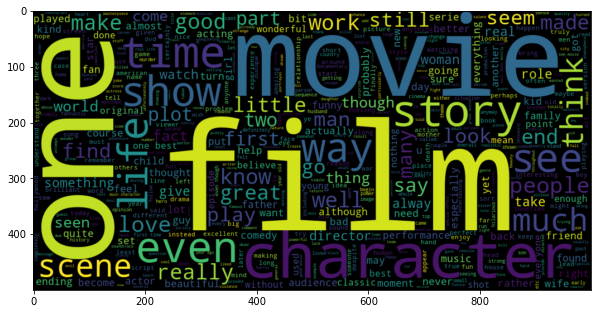

In [255]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text = ' '.join(df_pos['review'].values)
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words, interpolation='bilinear')
plt.show

Облако слов для негативного класса

In [257]:
df_neg = df[df['sentiment'] == 0]

<function matplotlib.pyplot.show(close=None, block=None)>

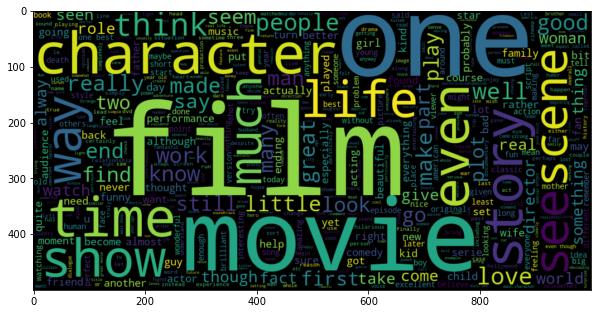

In [259]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text = ' '.join(df_pos['review'].values)
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words, interpolation='bilinear')
plt.show

In [260]:
fdist.most_common(10)

[('movie', 87934),
 ('film', 79672),
 ('one', 53585),
 ('like', 40160),
 ('good', 29737),
 ('time', 25099),
 ('even', 24855),
 ('would', 24599),
 ('story', 23108),
 ('really', 23089)]